# Implementing a 3-layer architecture Neural Network from scratch

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
make_circles?

## Data Preparation

In [14]:
dataset = 'xor'

In [152]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(500, True, 0.2, 1)
    elif dataset=='circles':
        X,Y = make_circles(500, True, 0.2, 1, 0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500, n_classes=2, n_features=2, n_informative=2, n_redundant=0, random_state=1)
    else:
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        Y = np.array([0, 1, 1, 0])
    return X,Y

In [26]:
X,Y = load_dataset(dataset)

In [27]:
print(X.shape)
print(Y.shape)

(4, 2)
(4,)


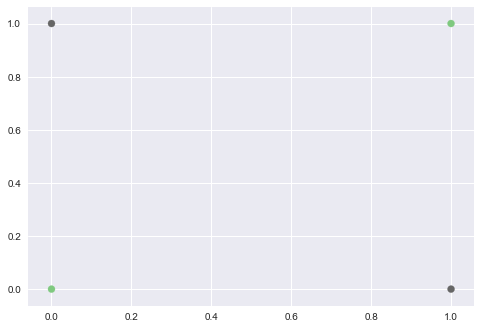

In [28]:
plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Accent)
plt.show()

In [ ]:
# [4, 3]

In [29]:
a = np.array([[12, 11], [20, 20]])
np.sum(a, axis=1, keepdims=True)

array([[23],
       [40]])

In [30]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea, axis=1, keepdims=True)

In [31]:
a = np.array([[10, 10], [20, 20]])

In [32]:
a_ = softmax(a)

In [33]:
print(a_.shape)

(2, 2)


In [103]:
print(a_)
input_size = 2
layers = [4,3]
output_size = 2
EPOCHS=50

[[0.5 0.5]
 [0.5 0.5]]


In [118]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        model={}
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))
        
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))
        
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))
        
        self.model = model
        
    def forward(self, x):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1, a2, y_)
        return y_
    
    def backward(self, x, y, learning_rate=0.001):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, y_ =  self.activation_outputs
        delta3 = y_ - y
        dW3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)
        
        delta2 = (1 - np.square(a2))*np.dot(delta3, W3.T)
        dW2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        delta1 = (1 - np.square(a1))*np.dot(delta2, W2.T)
        dW1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis = 0)
        
        self.model['W1'] = self.model['W1'] - learning_rate*dW1
        self.model['W2'] = self.model['W2'] - learning_rate*dW2
        self.model['W3'] = self.model['W3'] - learning_rate*dW3
        
        self.model['b1'] = self.model['b1'] - learning_rate*db1
        self.model['b2'] = self.model['b2'] - learning_rate*db2
        self.model['b3'] = self.model['b3'] - learning_rate*db3
        
    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)

    def summary(self):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, y_ =  self.activation_outputs
        print("W1 ", W1.shape)
        print("A1 ", a1.shape)
        print("W2 ", W1.shape)
        print("A2 ", a1.shape)
        print("W3 ", W1.shape)
        print("Y_ ", a1.shape)
    # P(dog), P(cat), P(horse)
    # 0.6, 0.3, 0.1
    # 1, 2, 3
    # [1, 0, 0] => Dog
    # [0, 1, 0] => Cat
    # [0, 0, 1] => Horse

In [122]:
def one_hot(y, depth):
    m = y.shape[0]
    y_ohv = np.zeros((m, depth))
    y_ohv[np.arange(m), y]=1
    return y_ohv
    
    # - ∑∑ y(i) * log(y'(i))
    
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l

model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)

In [123]:
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        model.backward(X,Y_OHT)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')

In [125]:
train(X,Y,model,1000)

Epoch 0 Loss 0.0933
Epoch 50 Loss 0.0878
Epoch 100 Loss 0.0827
Epoch 150 Loss 0.0780
Epoch 200 Loss 0.0738
Epoch 250 Loss 0.0699
Epoch 300 Loss 0.0663
Epoch 350 Loss 0.0630
Epoch 400 Loss 0.0600
Epoch 450 Loss 0.0572
Epoch 500 Loss 0.0546
Epoch 550 Loss 0.0522
Epoch 600 Loss 0.0499
Epoch 650 Loss 0.0479
Epoch 700 Loss 0.0459
Epoch 750 Loss 0.0441
Epoch 800 Loss 0.0424
Epoch 850 Loss 0.0409
Epoch 900 Loss 0.0394
Epoch 950 Loss 0.0380


In [126]:
model.summary()

W1  (2, 4)
A1  (4, 4)
W2  (2, 4)
A2  (4, 4)
W3  (2, 4)
Y_  (4, 4)


In [147]:
import itertools
def plot_decision_boundary(model, X, y, cmap=plt.cm.jet):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h=0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)

Training Accuracy: 100.0000


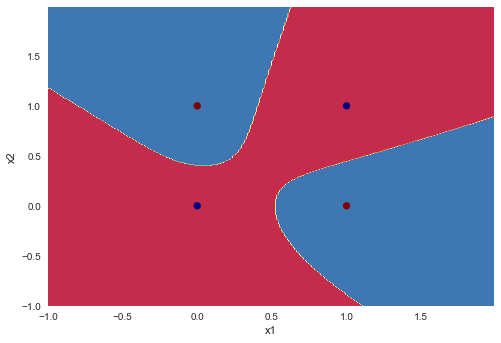

In [148]:
plot_decision_boundary(lambda x:model.predict(x), X, Y)
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy: %.4f"%(training_accuracy*100))

Training Accuracy: 100.0000
Training Accuracy: 96.0000
Training Accuracy: 97.4000
Training Accuracy: 96.4000


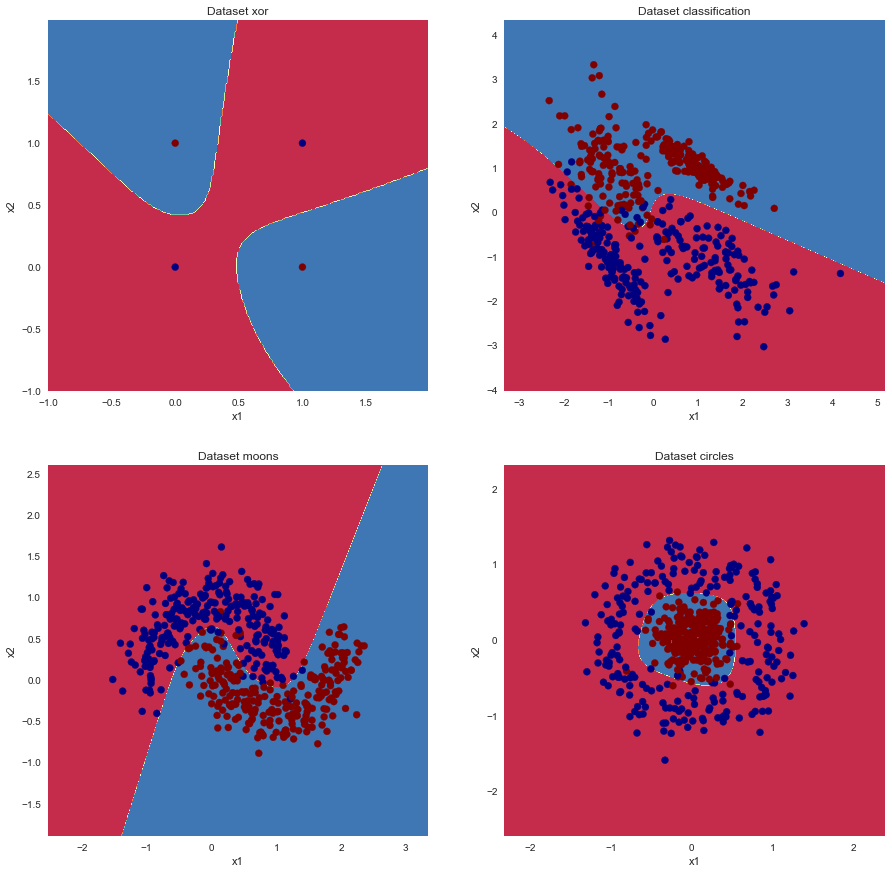

In [153]:
datasets = ["xor", "classification", "moons", "circles"]

id = 1
plt.figure(figsize= (15, 15))
for d in datasets:
    model = NeuralNetwork(input_size=2, layers=[4, 3], output_size=2)
    X, Y = load_dataset(d)
    train(X,Y,model,1000,logs=False)
    
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Accuracy: %.4f"%(training_accuracy*100))
    
    no = 220+id
    plt.subplot(no)
    plt.title("Dataset " + d)
    plot_decision_boundary(lambda x:model.predict(x), X, Y)
    id+=1
plt.show()